<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [14]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### Task 1: Become familiar with the dataset

In [5]:
## Task 1: Become familiar with the dataset
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### Task 2: Generate Descriptive Statistics and Visualizations


#### Boxplot of the "Median value of owner-occupied homes" (MEDV)

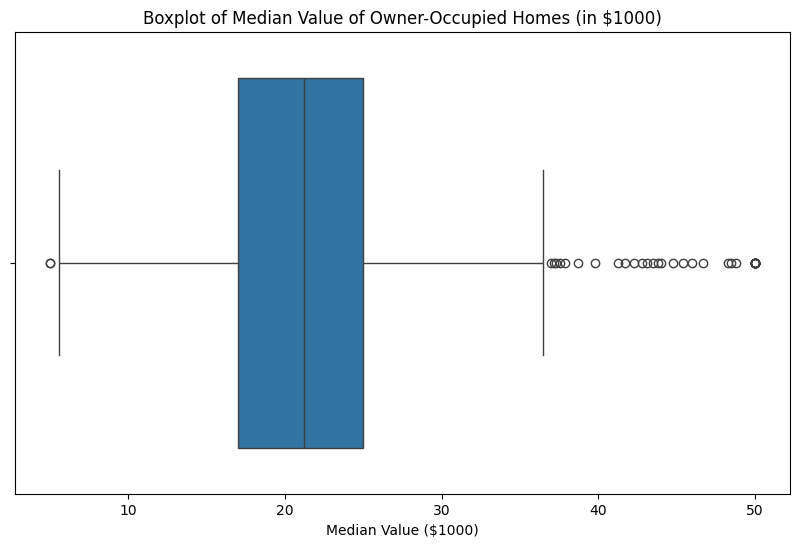

In [8]:
# Boxplot for Median Value of Owner-Occupied Homes
plt.figure(figsize=(10,6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (in $1000)')
plt.xlabel('Median Value ($1000)')
plt.show()


#### Bar Plot for the Charles River Variable (CHAS)

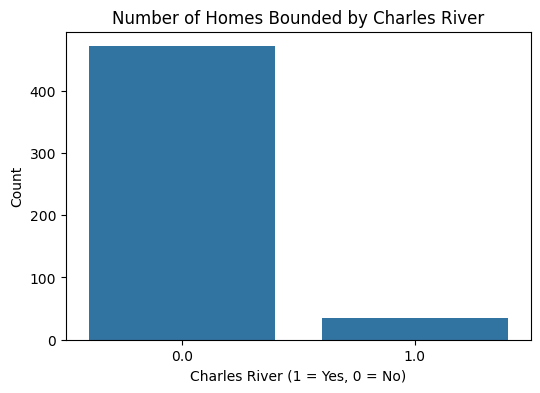

In [9]:
# Bar plot for Charles River variable
plt.figure(figsize=(6,4))
sns.countplot(x=boston_df['CHAS'])
plt.title('Number of Homes Bounded by Charles River')
plt.xlabel('Charles River (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


#### Boxplot of MEDV vs. AGE Groups

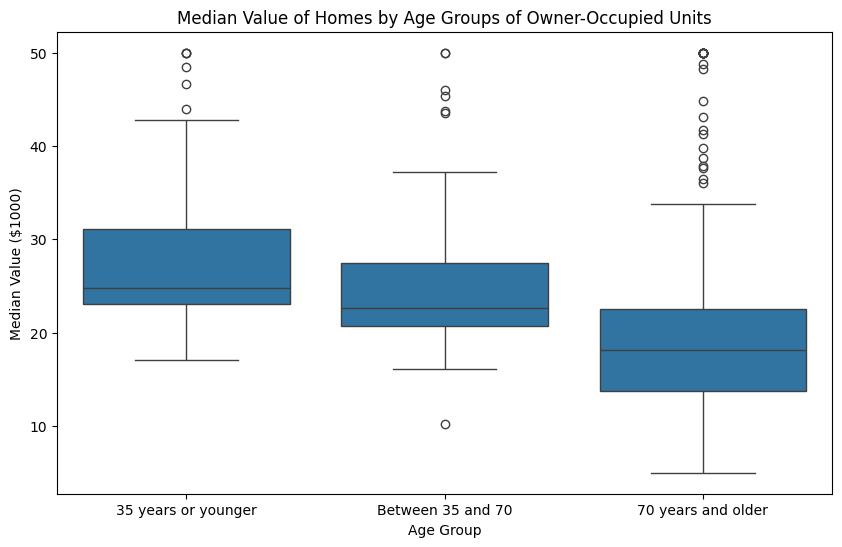

In [10]:
# Discretizing AGE into groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years or younger', 'Between 35 and 70', '70 years and older'])

# Boxplot for MEDV by AGE group
plt.figure(figsize=(10,6))
sns.boxplot(x=boston_df['AGE_group'], y=boston_df['MEDV'])
plt.title('Median Value of Homes by Age Groups of Owner-Occupied Units')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000)')
plt.show()


#### Scatter Plot: Nitric Oxide Concentrations (NOX) vs Non-Retail Business Acres (INDUS)

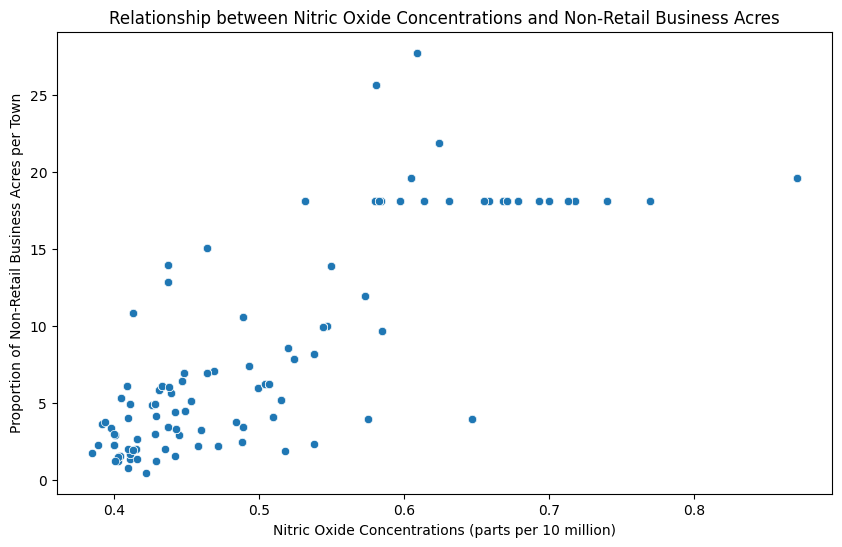

In [11]:
# Scatter plot of NOX vs INDUS
plt.figure(figsize=(10,6))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
plt.title('Relationship between Nitric Oxide Concentrations and Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres per Town')
plt.show()


#### Histogram of Pupil-Teacher Ratio (PTRATIO)

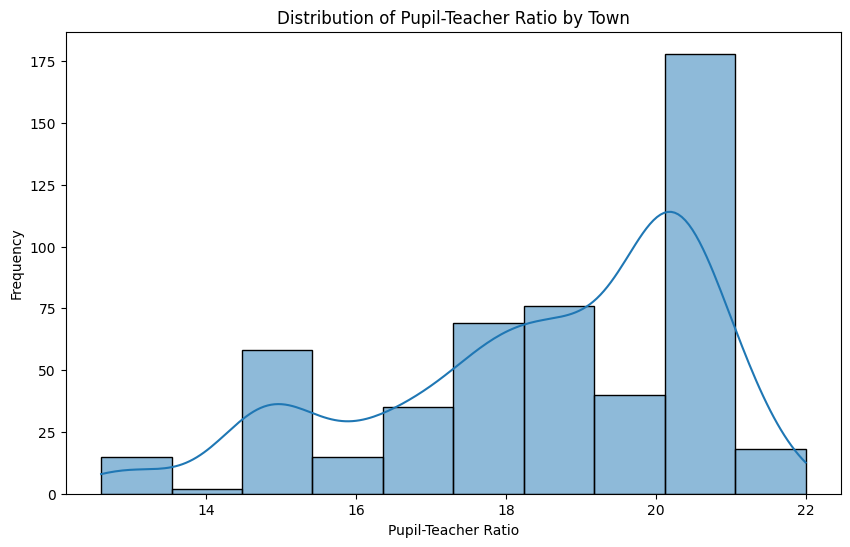

In [12]:
# Histogram for PTRATIO
plt.figure(figsize=(10,6))
sns.histplot(boston_df['PTRATIO'], bins=10, kde=True)
plt.title('Distribution of Pupil-Teacher Ratio by Town')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


### Task 3: Hypothesis Testing

#### Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#### Hypothesis
+ Null Hypothesis (H0): There is no significant difference in median house values between homes near the Charles River and those not near the river.
+ Alternative Hypothesis (Ha): There is a significant difference.

In [15]:
# T-test for independent samples
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = stats.ttest_ind(chas_1, chas_0)

print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")


T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05
Reject the null hypothesis: There is a significant difference.


#### Question 2: Difference in Median Values Based on AGE

#### Hypothesis
+ Null Hypothesis (H0): The median value of homes is the same across different age groups.
+ Alternative Hypothesis (Ha): There is a difference in median home values across different age groups.

In [16]:
# ANOVA test
anova_model = ols('MEDV ~ C(AGE_group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)


                    sum_sq     df         F        PR(>F)
C(AGE_group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN


#### Question 3: Relationship Between Nitric Oxide Concentrations (NOX) and Non-Retail Business Acres (INDUS)
#### Hypothesis:

+ Null Hypothesis (H0): There is no relationship between NOX and INDUS.
+ Alternative Hypothesis (): There is a relationship between NOX and INDUS.

In [17]:
# Pearson correlation test
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson Correlation: {correlation}, P-value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: There is a relationship.")
else:
    print("Fail to reject the null hypothesis: No relationship.")


Pearson Correlation: 0.7636514469209192, P-value: 7.913361061210442e-98
Reject the null hypothesis: There is a relationship.


#### Question 4: Impact of Weighted Distance to Employment Centers on Median Value of Homes
#### Hypothesis:

+ Null Hypothesis (H0): The weighted distance to employment centers has no effect on median home value.
+ Alternative Hypothesis (Ha): The weighted distance affects median home value.

In [18]:
# Regression analysis
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        14:21:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0